# Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
import umap

# define the columns of the dataset
# se is standard error
columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

d:\python\python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# read local file and load the dataset
df = pd.read_csv('./wdbc.data', header=None, names=columns)

# map the label
# M(alignant) -> 1
# B(enign) -> 0
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# split features and targets
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

In [10]:
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.shape

(569, 32)

# Preprocess and Analysis the dataset

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


In [ ]:
pd.Series(y).value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

From this result, we can see the imbalance inside target labels. Therefore, we add "class_weight='balanced'" to SVC function.

In [3]:
# normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

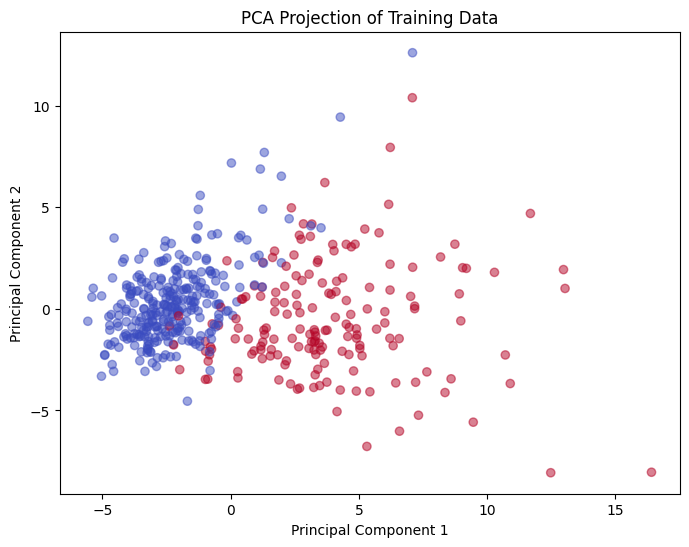

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)

plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.title('PCA Projection of Training Data')

plt.show()

We can observe that the blue and red points are clearly separable, indicating that the original features possess strong discriminative power.

## t-test

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

ttest_results = []

for column in X.columns:
    malignant_values = X[y == 0][column]
    benign_values = X[y == 1][column]
    
    # Perform an independent two-sample t-test
    t_stat, p_value = ttest_ind(malignant_values, benign_values, equal_var=False)
    
    ttest_results.append({
        'feature': column,
        't_statistic': t_stat,
        'p_value': p_value
    })

ttest_df = pd.DataFrame(ttest_results)

# Select features with statistically significant differences
significant_features = ttest_df[ttest_df['p_value'] < 0.05]
significant_features = significant_features.sort_values(by='p_value')

print("Number of significant features:", len(significant_features))
print(significant_features[['feature', 'p_value']])

Number of statistically significant features: 26
                    feature       p_value
27     concave_points_worst  1.061454e-96
22          perimeter_worst  1.032730e-72
7       concave_points_mean  3.127316e-71
20             radius_worst  3.556557e-71
2            perimeter_mean  1.023141e-66
0               radius_mean  1.684459e-64
26          concavity_worst  9.852484e-59
6            concavity_mean  3.742121e-58
23               area_worst  4.937924e-54
3                 area_mean  3.284366e-52
5          compactness_mean  9.607863e-42
25        compactness_worst  1.749835e-38
10                radius_se  1.491133e-30
21            texture_worst  5.198708e-30
12             perimeter_se  6.868553e-29
13                  area_se  2.983568e-26
1              texture_mean  3.019055e-25
24         smoothness_worst  3.474376e-24
17        concave_points_se  4.042197e-24
4           smoothness_mean  5.573331e-19
28           symmetry_worst  6.562499e-19
8             symmetry_mean

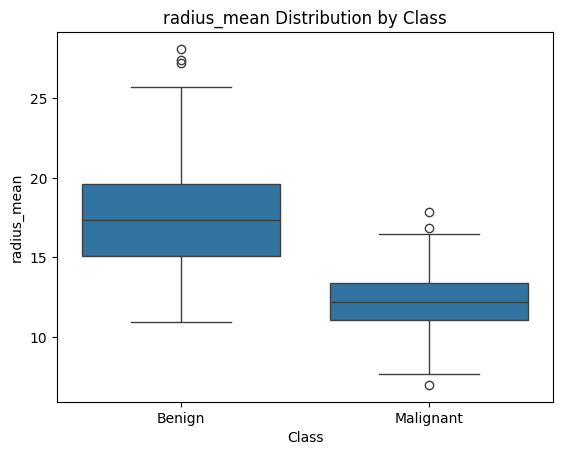

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# select the feature to plot
feature_to_plot = 'radius_mean'

sns.boxplot(x=y.map({0: 'Malignant', 1: 'Benign'}), y=X[feature_to_plot])
plt.title(f'{feature_to_plot} Distribution by Class')
plt.ylabel(feature_to_plot)
plt.xlabel('Class')
plt.show()


# Visualize the decision boundary

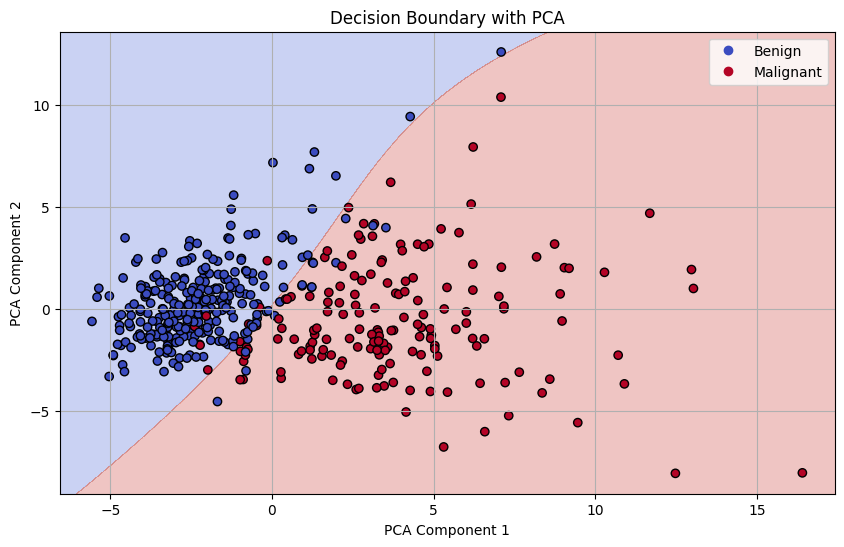

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train)
svm_2d = SVC(kernel='rbf', C=10, gamma=0.01, class_weight='balanced')
svm_2d.fit(X_pca_2d, y_train)

def plot_decision_boundary(clf, X, y, title="Decision Boundary with PCA"):
    h = 0.01
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Benign', 'Malignant'])
    plt.grid(True)
    plt.show()

plot_decision_boundary(svm_2d, X_pca_2d, y_train)

# Search on best hyperparameters

## Test without PCA

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# test the choice of n for pca & hyperparameters for SVM
pipe = Pipeline([
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svm__kernel': ['poly', 'rbf'],
    'svm__class_weight': ['balanced']
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params: {'svm__C': 10, 'svm__class_weight': 'balanced', 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Score: 0.9780219780219781


## Test with PCA

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# test the choice of n for pca & hyperparameters for SVM
pipe = Pipeline([
    ('pca', PCA()),
    ('svm', SVC())
])

param_grid = {
    'pca__n_components': list(range(2, 31, 1)),
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svm__kernel': ['rbf'],
    'svm__class_weight': ['balanced']
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 580 candidates, totalling 2900 fits
Best Params: {'pca__n_components': 14, 'svm__C': 10, 'svm__class_weight': 'balanced', 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Score: 0.9802197802197803


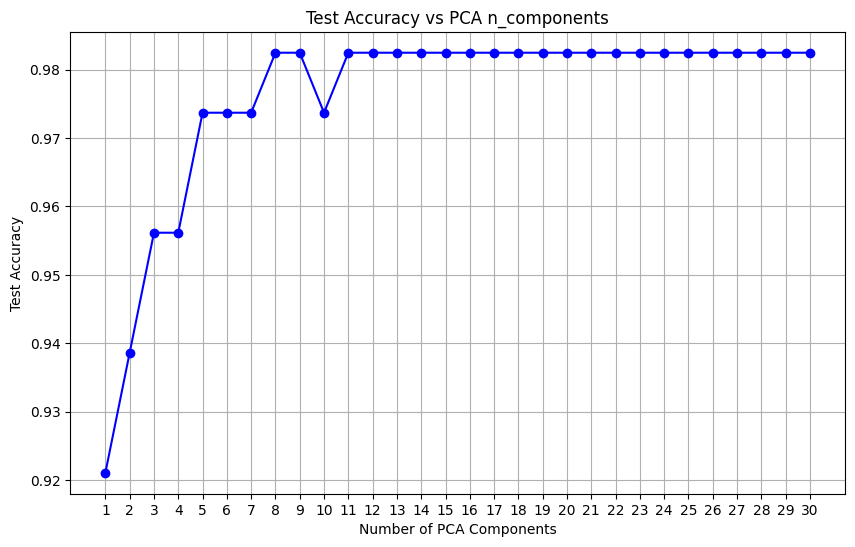

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracies = []

svm_model = SVC(kernel='rbf', C=10, gamma=0.01, class_weight='balanced')

for n in range(1, 31):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    svm_model.fit(X_train_pca, y_train)
    y_pred = svm_model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), accuracies, marker='o', color='blue')
plt.title("Test Accuracy vs PCA n_components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.xticks(range(1, 31))
plt.show()


Based on the results above, it is evident that a large number of PCA components is not necessary; having more than 11 components is sufficient.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(X_train)

print("PCA explained variance ratio: ", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", pca.explained_variance_ratio_.cumsum())

PCA explained variance ratio:  [4.51826894e-01 1.83623344e-01 9.56494283e-02 6.37564539e-02
 5.60927624e-02 3.92313591e-02 2.23001535e-02 1.55001729e-02
 1.28307278e-02 1.15367804e-02 1.01015018e-02 8.79824966e-03
 7.96221467e-03 4.66025560e-03 2.99768580e-03 2.50906058e-03
 2.00426442e-03 1.78546291e-03 1.59821155e-03 1.01902152e-03
 9.97402856e-04 8.00972320e-04 7.93865222e-04 5.46640669e-04
 5.13311146e-04 2.68602960e-04 2.14653438e-04 5.09277885e-05
 2.54802331e-05 4.13883172e-06]
Cumulative explained variance ratio: [0.45182689 0.63545024 0.73109967 0.79485612 0.85094888 0.89018024
 0.91248039 0.92798057 0.9408113  0.95234808 0.96244958 0.97124783
 0.97921004 0.9838703  0.98686798 0.98937704 0.99138131 0.99316677
 0.99476498 0.995784   0.99678141 0.99758238 0.99837624 0.99892289
 0.9994362  0.9997048  0.99991945 0.99997038 0.99999586 1.        ]


As shown by the explained variance ratio, the first 10 principal components capture over 95% of the total variance in the dataset.

## Test with different kernels


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# test the choice of n for pca & hyperparameters for SVM
pipe = Pipeline([
    ('pca', PCA()),
    ('svm', SVC())
])

param_grid = {
    'pca__n_components': [17],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svm__kernel': ['poly', 'sigmoid'],
    'svm__class_weight': ['balanced'],
    'svm__degree': [2, 3, 4],
    'svm__coef0': [0, 0.5, 1, 2, 3, 4]
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Params: {'pca__n_components': 17, 'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__coef0': 3, 'svm__degree': 4, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}
Best Score: 0.9802197802197803


Although the grid search yielded similar cross-validation performance for both RBF and polynomial kernels, the model with the polynomial kernel demonstrated noticeably worse generalization on the test set. This suggests that the polynomial kernel may have overfit the training data. Therefore, the RBF kernel model is selected as the final model due to its better generalization performance.

## Test with feature selection instead of PCA

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

# test the choice of n for pca & hyperparameters for SVM
pipe = Pipeline([
    ('selector', SelectKBest()),
    ('svm', SVC())
])

param_grid = {
    'selector__score_func': [f_classif],
    'selector__k': list(range(2, 31, 1)),
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svm__kernel': ['rbf'],
    'svm__class_weight': ['balanced']
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 1015 candidates, totalling 5075 fits
Best Params: {'selector__k': 18, 'selector__score_func': <function f_classif at 0x000001E7829FF940>, 'svm__C': 100, 'svm__class_weight': 'balanced', 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Score: 0.9780219780219781


We can see from the result that feature selection isn't as well as PCA. However, when we further test selector on test set, it has the same performance as PCA.

# Final test

Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9761904761904762
F1 Score: 0.9879518072289156

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



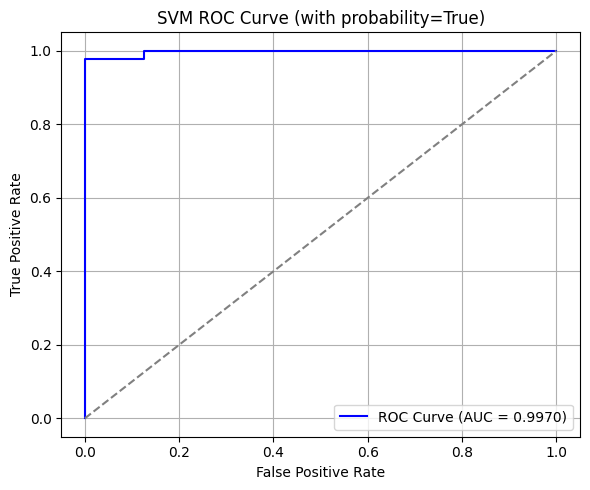

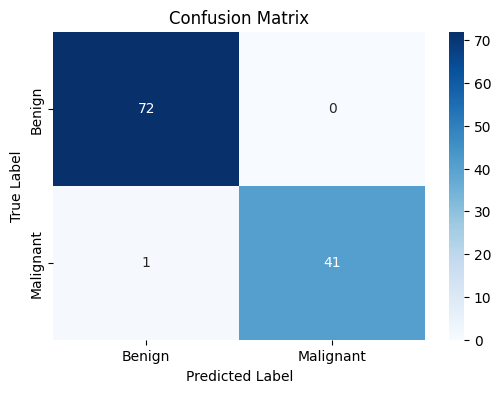

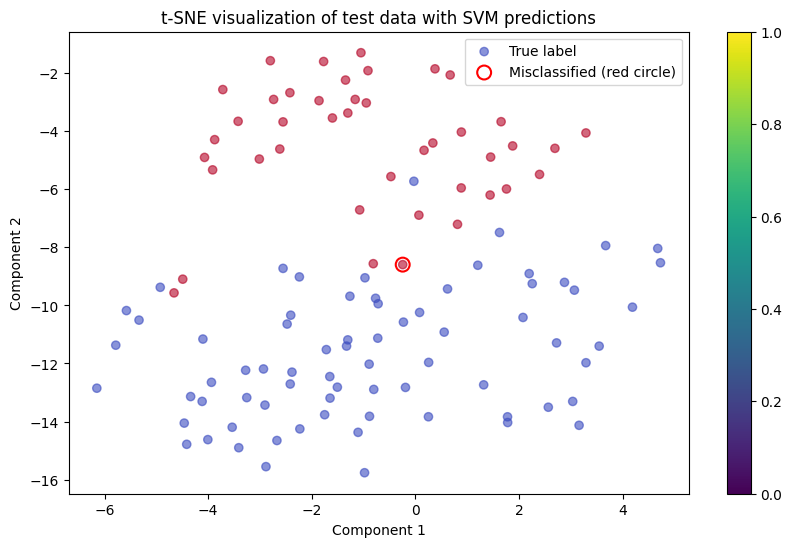

d:\python\python38\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


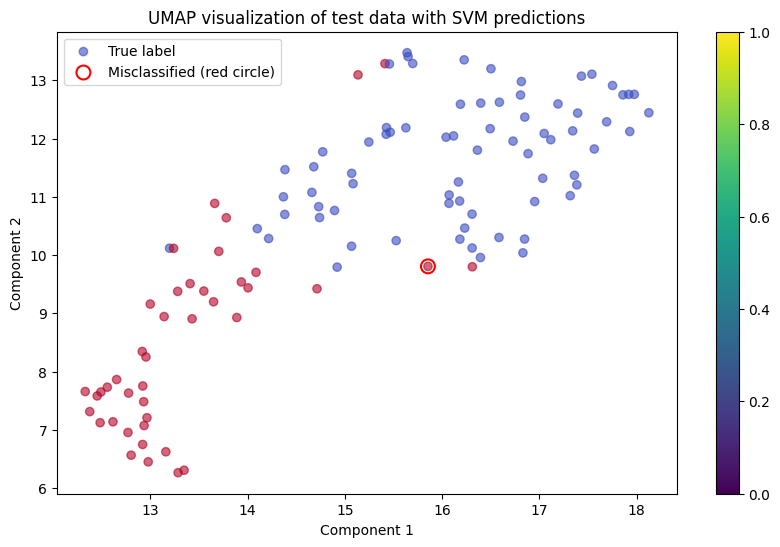

In [ ]:
# train SVM model
svm_model_selc = SVC(kernel='rbf', C=100, gamma=0.01, class_weight='balanced', probability=True)
svm_model = SVC(kernel='rbf', C=10, gamma=0.01, class_weight='balanced', probability=True)

use_pca = True
use_selc = False
X_tested = None # defined to plot t-SNE and UMAP

if use_pca:
    # pca reduces dimension
    pca = PCA(n_components=20)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    # train and test with pca
    svm_model.fit(X_train_pca, y_train)
    y_pred = svm_model.predict(X_test_pca)
    # To plot the ROC curve, we only get the Malignant predictions
    y_proba = svm_model.predict_proba(X_test_pca)[:, 1]
    X_tested = X_test_pca
elif use_selc:
    selector = SelectKBest(score_func=f_classif, k=18)
    X_train_selc = selector.fit_transform(X_train, y_train)
    X_test_selc = selector.transform(X_test)
    svm_model_selc.fit(X_train_selc, y_train)
    y_pred = svm_model_selc.predict(X_test_selc)
    y_proba = svm_model_selc.predict_proba(X_test_selc)[:, 1]
    X_tested = X_test_selc
else:
    # train and test without pca
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    y_proba = svm_model.predict_proba(X_test)[:, 1]
    X_tested = X_test

# model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# calculate the plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve (with probability=True)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# visualize the confusing matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# plot t-SNE and UMAP
def plot_embedding(X_embedded, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_test, cmap='coolwarm', marker='o', alpha=0.6, label='True label')
    for i, pred in enumerate(y_pred):
        if pred != y_test.values[i]:
            plt.scatter(X_embedded[i, 0], X_embedded[i, 1], facecolors='none', edgecolors='red', s=100, linewidths=1.5)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(['True label', 'Misclassified (red circle)'])
    plt.show()

tsne = TSNE(n_components=2)
X_test_tsne = tsne.fit_transform(X_tested)
plot_embedding(X_test_tsne, "t-SNE visualization of test data with SVM predictions")

umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_test_umap = umap_reducer.fit_transform(X_tested)
plot_embedding(X_test_umap, "UMAP visualization of test data with SVM predictions")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

use_pca = True
X_used = X_train
y_used = y_train

if use_pca:
    pca = PCA(n_components=20)
    pca.fit(X_train)
    X_used = pca.transform(X_train)
else:
    X_used = X_train

# initialize cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# store the validation result
acc_scores = []
prec_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_used, y_used)):
    X_tr, X_val = X_used[train_idx], X_used[val_idx]
    y_tr, y_val = y_used.iloc[train_idx], y_used.iloc[val_idx]

    # train the model
    svm_model = SVC(kernel='rbf', C=10, gamma=0.01, class_weight='balanced', probability=True)
    svm_model.fit(X_tr, y_tr)

    # validate the model
    y_val_pred = svm_model.predict(X_val)
    y_val_proba = svm_model.predict_proba(X_val)[:, 1]

    # calculate the metrics
    acc_scores.append(accuracy_score(y_val, y_val_pred))
    prec_scores.append(precision_score(y_val, y_val_pred))
    recall_scores.append(recall_score(y_val, y_val_pred))
    f1_scores.append(f1_score(y_val, y_val_pred))
    roc_auc_scores.append(roc_auc_score(y_val, y_val_proba))

    print(f"Fold {fold + 1} - Accuracy: {acc_scores[-1]:.4f}, Precision: {prec_scores[-1]:.4f}, Recall: {recall_scores[-1]:.4f}, F1: {f1_scores[-1]:.4f}, ROC-AUC: {roc_auc_scores[-1]:.4f}")

print(f"\nAverage 5-Fold CV Results:")
print(f"Accuracy: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
print(f"Precision: {np.mean(prec_scores):.4f} ± {np.std(prec_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"ROC-AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")

Fold 1 - Accuracy: 0.9670, Precision: 1.0000, Recall: 0.9118, F1: 0.9538, ROC-AUC: 0.9969
Fold 2 - Accuracy: 0.9780, Precision: 0.9444, Recall: 1.0000, F1: 0.9714, ROC-AUC: 1.0000
Fold 3 - Accuracy: 0.9890, Precision: 1.0000, Recall: 0.9706, F1: 0.9851, ROC-AUC: 0.9985
Fold 4 - Accuracy: 0.9780, Precision: 1.0000, Recall: 0.9412, F1: 0.9697, ROC-AUC: 0.9866
Fold 5 - Accuracy: 0.9890, Precision: 1.0000, Recall: 0.9706, F1: 0.9851, ROC-AUC: 0.9969

Average 5-Fold CV Results:
Accuracy: 0.9802 ± 0.0082
Precision: 0.9889 ± 0.0222
Recall: 0.9588 ± 0.0300
F1 Score: 0.9730 ± 0.0116
ROC-AUC: 0.9958 ± 0.0047
